# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns

# <h2>1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)</h3>

In [2]:
data = pd.read_csv('C:/Users/okho004/Desktop/ML/1 ДЗ/Лекция_2/adult.csv') # датасет - https://www.kaggle.com/rio2016/olympic-games
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## <h2>2. Проведите первичный анализ.</h2>

In [3]:
data.shape

(48842, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# количество уникальных значений
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [8]:
# data.loc [:, 'capital-gain':'income']

In [9]:
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [10]:
len(data['native-country'].unique())

42

In [11]:
data['native-country'].value_counts().head(10)

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: native-country, dtype: int64

In [12]:
data.sort_values(by = 'age').tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12446,90,Private,347074,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1944,12,United-States,<=50K
19172,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K
8982,90,Private,225063,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
28277,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
899,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K


# <h2>3. Проверьте данные на пропуски. Удалите в случае обнаружения.</h2> 

In [13]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
data[data == 0].count()

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain       44807
capital-loss       46560
hours-per-week         0
native-country         0
income                 0
dtype: int64

In [15]:
data[data =='?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [16]:
# Заменяем пропуски '?' на 0
data = data.replace('?', 0)#, regex=True)

In [17]:
data[data =='?'].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [18]:
# поиск отрицательных значений
data[data.select_dtypes(include=['float64', 'int64'])<0].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# <h2>4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).</h2>

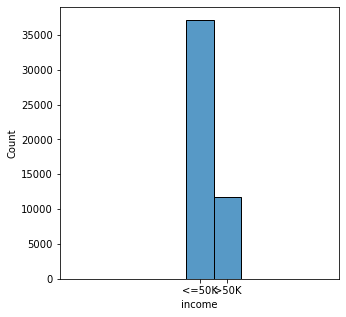

In [19]:
# распределение данных по доходу
plt.figure(figsize=(5, 5))
sns.histplot(data['income'], bins=2)
plt.xlim(-5, 5)
plt.show()

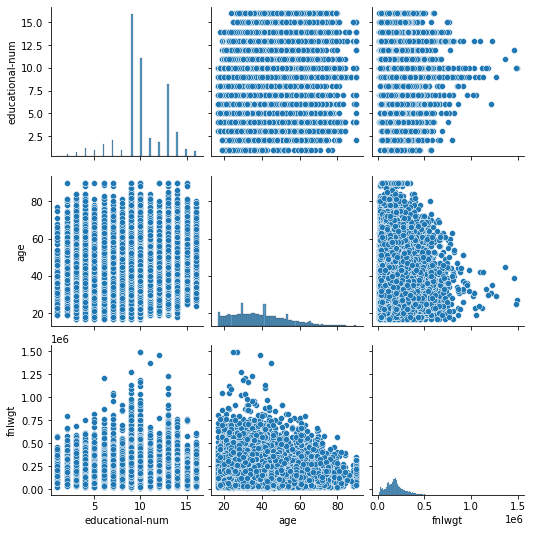

In [20]:
sns.pairplot(data[['educational-num','age','fnlwgt']])

# <h2>5. Преобразуйте категориальные признаки.</h2>

<div class="alert alert-info"><p> Далее используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения.</p></div>

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# определим зависимость между числовыми характеристиками
selectedColumns = data[ [ 'age',	'fnlwgt',	'educational-num',	'capital-gain',	'capital-loss',	'hours-per-week' ] ]



In [23]:
correlation_matrix = selectedColumns.corr(method='pearson').round(2)
correlation_matrix

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.03,0.08,0.06,0.07
fnlwgt,-0.08,1.00,-0.04,-0.00,-0.00,-0.01
educational-num,0.03,-0.04,1.00,0.13,0.08,0.14
capital-gain,0.08,-0.00,0.13,1.00,-0.03,0.08
capital-loss,0.06,-0.00,0.08,-0.03,1.00,0.05
hours-per-week,0.07,-0.01,0.14,0.08,0.05,1.00


<AxesSubplot:>

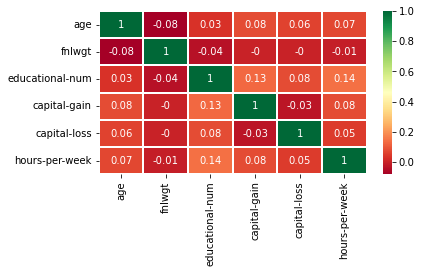

In [24]:
f, ax = plt.subplots(figsize=(6, 3 ))
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)

In [25]:
# выделяем категориальные столбцы

data.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [47]:
# переведем их в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( data, columns = [ 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country'] )

# столбец income является целевой переменной, удаляем его из данных
del X['income']
#data2.drop('income', 1) 
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X.shape
# data2.columns

(48842, 108)

In [32]:
y = data.loc[ :, ['income'] ]
y.head()

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['income'])
# записываем в таргетную переменную y преобразованный столбец income

# y = pd.Series (data = le.transform(data['income']))
# y.head(10)
# y.nunique()

2

# <h2>6. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.</h2>

In [44]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# <h2>7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.</h2>
# <h2>8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.</h2>
# <h3>7.1. Логистическая регрессия.</h3>

In [45]:
model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn

In [51]:
# обучаем модель

model.fit( X, y )
predictions = model.predict_proba( X )

c:\Users\okho004\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([[0.81985386, 0.18014614],
       [0.76122507, 0.23877493],
       [0.86303691, 0.13696309],
       [0.19875839, 0.80124161],
       [0.72372046, 0.27627954]])

In [53]:
model.predict(X_test) # получаем массив

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
model.predict_proba(X_test)

array([[0.68411616, 0.31588384],
       [0.75246018, 0.24753982],
       [0.02843547, 0.97156453],
       ...,
       [0.78016552, 0.21983448],
       [0.7436501 , 0.2563499 ],
       [0.77177684, 0.22822316]])

<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [64]:
model.score(X_train, y_train) 

0.796867402042331

In [65]:
model.score(X_test,y_test)

0.8039717473641109

# <h3>7.2. Метод опорных векторов.</h3>

In [57]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

<p>Снова получаем наш скор, для обучающей и тестовой выборок.</p>

In [58]:
clf.score(X_train, y_train)

0.8616691833235226

In [59]:
clf.score(X_test, y_test)

0.8540280479066434

<p>Без StandardScaler получаем более худший результат:</p>

In [60]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [61]:
svc.score(X_train, y_train)

0.9544954316279785

In [63]:
svc.score(X_test, y_test)

0.7643566383457877

# <h2>9. Сформулируйте выводы по проделанной работе.</h2>

# <h2>10. Кратко опишите какие преобразования были сделаны с данными.</h2>

# <h2>11. Сравните точность двух моделей.</h2>

# <h2>12. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат?</h2>